# **1. Import Modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.	Create KPIs
-	Total Revenue = sum of Sales
-	Total Profit = sum of Profit
-	Profit Ratio = Total Profit / Total Profit
-	Customer = count distinct Customer
-	Sales per Customer = Total Revenue/# Customer
-	Quantity: = sum of Quantity


# **2. Import Data**

In [2]:
df = pd.read_excel('Data/Super-Store-2021.xlsx')

In [3]:
df.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,Shipped On Time,Kentucky,Bookcases,3,3,0.00,42,2,262,392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,Shipped On Time,Kentucky,Chairs,3,3,0.00,220,3,732,1096
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2020-06-12,CA-2020-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,Shipped Late,California,Labels,4,3,0.00,7,2,15,22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,Shipped Late,Florida,Tables,7,6,0.45,-383,5,958,1434
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,Shipped Late,Florida,Storage,7,6,0.20,3,2,22,33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Country/Region          9994 non-null   object        
 3   Customer ID             9994 non-null   object        
 4   Customer Name           9994 non-null   object        
 5   Order Date              9994 non-null   datetime64[ns]
 6   Order ID                9994 non-null   object        
 7   Postal Code             9983 non-null   float64       
 8   Product ID              9994 non-null   object        
 9   Product Name            9994 non-null   object        
 10  Region                  9994 non-null   object        
 11  Row ID                  9994 non-null   int64         
 12  Segment                 9994 non-null   object  

# **3. KPIs**

In [15]:
#Total revenue = total sales
"${:,.0f}".format(df['Sales'].sum())

'$2,297,354'

In [10]:
#Total profit = total profit
"${:,.0f}".format(df['Profit'].sum())

'$286,347'

In [11]:
#Profit ratio = total profit / total revenue
"{:.2%}".format(df['Profit'].sum()/df['Sales'].sum())

'12.46%'

In [13]:
#Customer = count distinct customer
df['Customer ID'].nunique()

793

In [19]:
#Sales per Customer = Total revenue / Customer
"${:,.1f}".format(df['Sales'].sum() / df['Customer ID'].nunique())

'$2,897.0'

In [21]:
#Quantity = sum of Quantity
"{:,.0f}".format(df['Quantity'].sum())

'37,873'

# **4. Visualization**

2.	Using bar chart to visualize Total Revenue/ Total Profit /# Customer/ Sales per Customer/ Quantity by Region. If you are the analyst, what should you comment based on this information.

## Numerical Pre-processing

In [23]:
df.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

In [24]:
df_region = pd.DataFrame({'Revenue': df.groupby('Region')['Sales'].sum(),
                'Profit':df.groupby('Region')['Profit'].sum(),
                'No Customer':df.groupby('Region')['Customer ID'].nunique(),
                'Quantity':df.groupby('Region')['Quantity'].sum()
            }).reset_index()
df_region

,Region,Revenue,Profit,No Customer,Quantity
0,Central,501256,39719,629,8780
1,East,678834,91521,674,10618
2,South,391750,46721,512,6209
3,West,725514,108386,686,12266


In [25]:
df_region['Sales per customer'] = df_region['Revenue'] / df_region['No Customer']
df_region

,Region,Revenue,Profit,No Customer,Quantity,Sales per customer
0,Central,501256,39719,629,8780,796.909380
1,East,678834,91521,674,10618,1007.172107
2,South,391750,46721,512,6209,765.136719
3,West,725514,108386,686,12266,1057.600583


## Visualizing

<BarContainer object of 4 artists>

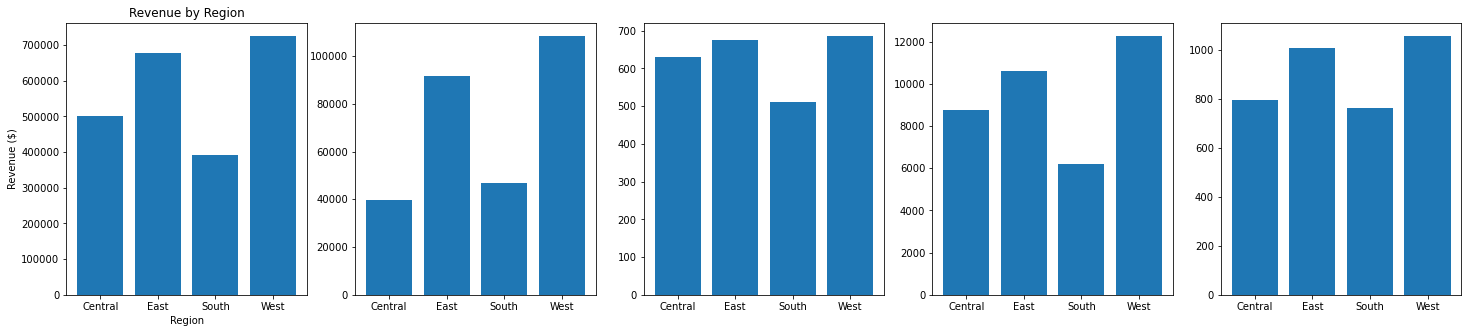

In [32]:
fig, ax = plt.subplots(ncols=5, figsize=(25, 5))
ax[0].bar(df_region['Region'], df_region['Revenue'])
ax[0].set(ylabel='Revenue ($)', xlabel='Region', title='Revenue by Region')

ax[1].bar(df_region['Region'], df_region['Profit'])

ax[2].bar(df_region['Region'], df_region['No Customer'])

ax[3].bar(df_region['Region'], df_region['Quantity'])

ax[4].bar(df_region['Region'], df_region['Sales per customer'])
